In [22]:
import ic_sets, auction_data
hist_plot = auction_data.hist_plot
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline

In [2]:
tsuchiura_data = auction_data.AuctionData('tests/reference_data/tsuchiura_data.csv')
ic_solver = ic_sets.ICSets(rho_p=.001, rho_m=.001, auction_data=tsuchiura_data, 
                           k=.1, t=.05, m=.5)

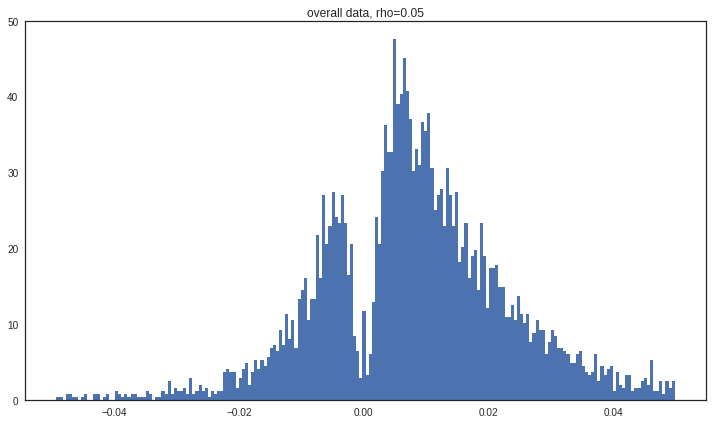

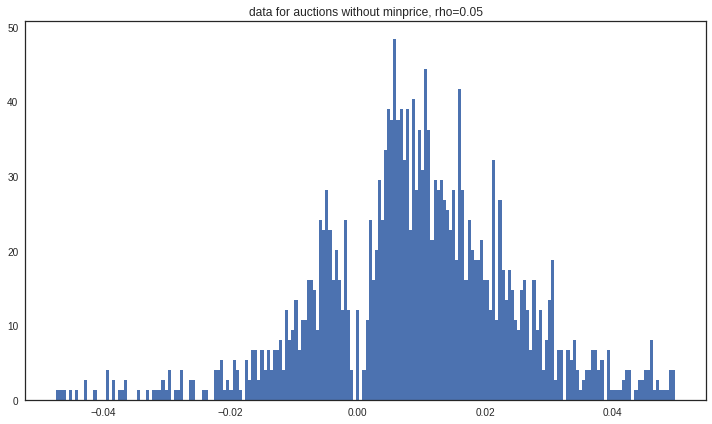

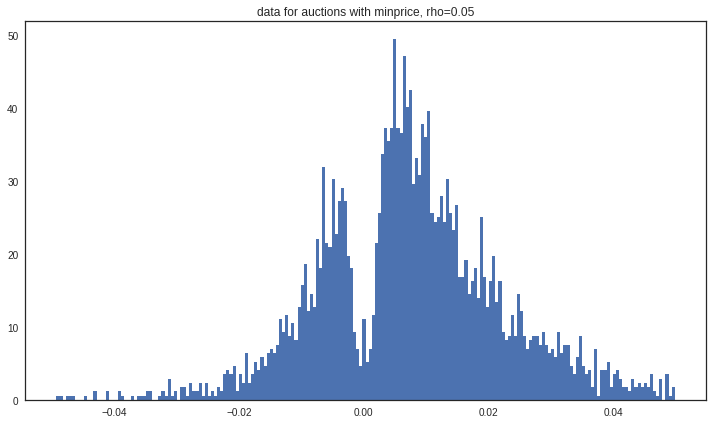

In [3]:
delta = tsuchiura_data.df_bids.norm_bid - tsuchiura_data.df_bids.most_competitive
rho = .05
delta = delta[delta.between(-rho, rho)]
hist_plot(delta,'overall data, rho={}'.format(rho))
hist_plot(delta[tsuchiura_data.df_bids.minprice.isnull()], 
          'data for auctions without minprice, rho={}'.format(rho))
hist_plot(delta[~tsuchiura_data.df_bids.minprice.isnull()], 
          'data for auctions with minprice, rho={}'.format(rho))

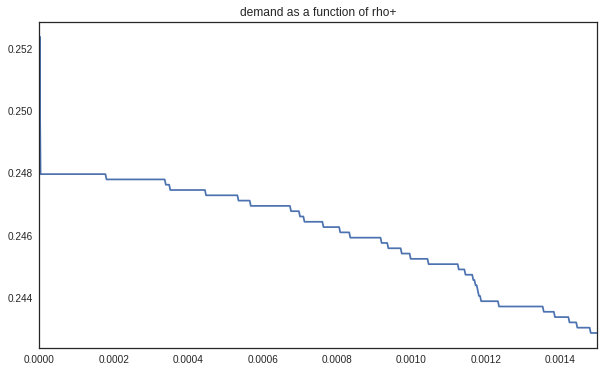

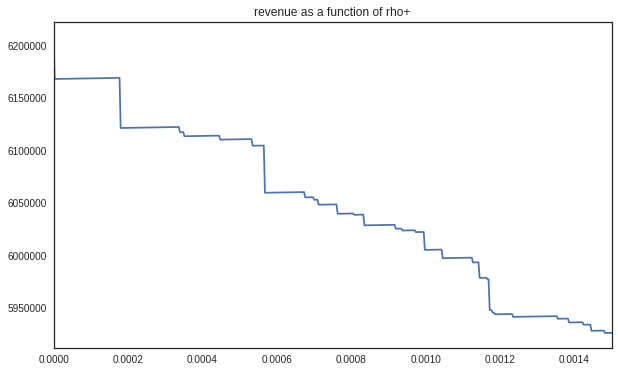

In [4]:
tsuchiura_data.get_counterfactual_demand(.0015,.0).demand.plot(figsize = (10,6))
plt.title('demand as a function of rho+')
plt.show()

tsuchiura_data.get_counterfactual_demand(.0015,.0).revenue.plot(figsize = (10,6))
plt.title('revenue as a function of rho+')
plt.show()

## Test: inference from upper deviation alone as $m$ varies

This should be equivalent to the case where there are no information constraints

testing p_c = (0.0, 0.80000000000000004, 0.20000000000000001, 1.0)
	is rationalizable upper: True
testing p_c = (0.20000000000000001, 0.20000000000000001, 0.80000000000000004, 0.80000000000000004)
	is rationalizable upper: False
testing p_c = (0.40000000000000002, 0.5, 0.60000000000000009, 0.5)
	is rationalizable upper: False
testing p_c = (0.60000000000000009, 0.80000000000000004, 0.40000000000000002, 0.20000000000000001)
	is rationalizable upper: False
testing p_c = (0.10000000000000001, 0.0, 0.60000000000000009, 0.30000000000000004)
	is rationalizable upper: True


In [11]:
list_p_c[[1,2,3]]

TypeError: list indices must be integers, not list

## Test: inference from upper and lower deviations as $m$ varies -- i.i.d. case

In [37]:
steps = np.linspace(0, 1, 5)
list_p_c = list(itertools.product(steps, repeat=4))

ic_solver.set_tolerance_parameters(m=.5, t=.0, k=0)

index = []
rationalizability_data = []
for i, test_pc in enumerate(list_p_c):
    index.append(i)
    is_rationalizable_iid = ic_solver.is_rationalizable_iid(test_pc)
    is_rationalizable = ic_solver.is_rationalizable(test_pc)
    rationalizability_data.append([is_rationalizable_iid, is_rationalizable])
    
df_rationalizable = pd.DataFrame(data = rationalizability_data, index = index, columns=['iid', 'general'])

In [38]:
(df_rationalizable.loc[:,'iid'] == df_rationalizable.loc[:,'general']).mean()

0.624

In [44]:
(df_rationalizable.loc[:,'iid'] > df_rationalizable.loc[:,'general']).mean()

0.312

In [46]:
df_rationalizable

,iid,general
0,False,True
1,True,False
2,True,False
3,True,True
4,True,False
5,False,False
6,True,False
7,True,False
8,True,False
9,True,False


In [48]:
list_p_c[1]

(0.0, 0.0, 0.0, 0.25)